In [1]:
import os 
print(os.getcwd())
print(os.listdir())

c:\AI_project
['.git', '.venv', 'AI_project-1', 'dataset', 'hello.ipynb', 'Practice_CodingTest.ipynb', 'py', 'pythonbasic.ipynb', 'README.md']


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

In [24]:
# Setting random seed for 재현성
random.seed(42)
np.random.seed(42)

In [25]:
# Data
x = np.array([[1],[2],[3],[4],[5]]) # 독립변수
y = np.array([2,4,5,4,5]) # 종속변수

# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
# model 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
# 예측 및 평가
predictions = model.predict(x_test)

In [28]:
# Result
print("Size of train data : ", x_train.shape[0])
print("Size of test data : ", x_test.shape[0])
print("\n모델 계수 : ")
print("Slope : ", model.coef_[0])
print("Intercept : ", model.intercept_)
print("\ntest set 실제값 : ", y_test)
print("test set 예측값 : ", predictions)
print("\n모델 성능 : ")
print("R_square score : ", r2_score(y_test, predictions))
print("평균제곱오차(MSE) : ", mean_squared_error(y_test, predictions))
      

Size of train data :  4
Size of test data :  1

모델 계수 : 
Slope :  0.6857142857142857
Intercept :  1.7714285714285714

test set 실제값 :  [4]
test set 예측값 :  [3.14285714]

모델 성능 : 
R_square score :  nan
평균제곱오차(MSE) :  0.7346938775510206


c:\AI_project\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


#### 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예


In [29]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Loading data
df = pd.read_csv("dataset/diabetes.csv")

In [31]:
# data 확인
print("* DataSet Size : ", df.shape)
print("\n* First 5 colunm : ")
print(df.head())
print("\n* 기술통계 : ")
print(df.describe())


* DataSet Size :  (768, 9)

* First 5 colunm : 
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

* 기술통계 : 
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.00

In [32]:
# 독립변수x와 종속변수y 분리
X = df.drop('Outcome', axis=1) # outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


In [33]:
# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred)) # 1에 가까울수록 적다
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred)) # 17% 의 오차가 있음 > bad
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred)) # 무려 34%!! > very bad


모델 성능:
R² 점수: 0.25500281176741757
평균 제곱 오차 (MSE): 0.17104527280850101
평균 절대 오차 (MAE): 0.34812825999928226


In [34]:
# 특성 중요도 분석
feature_importance = pd.DataFrame({        # feature : 결과값y를 제외한 나머지
    'feature' : X.columns,
    'importance' : np.abs(model.coef_)     # coef_ : 기울기
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도 : ")
print(feature_importance)


특성 중요도 : 
                    feature  importance
6  DiabetesPedigreeFunction    0.111263
5                       BMI    0.015039
0               Pregnancies    0.010468
7                       Age    0.006460
1                   Glucose    0.005634
2             BloodPressure    0.002281
3             SkinThickness    0.000532
4                   Insulin    0.000278


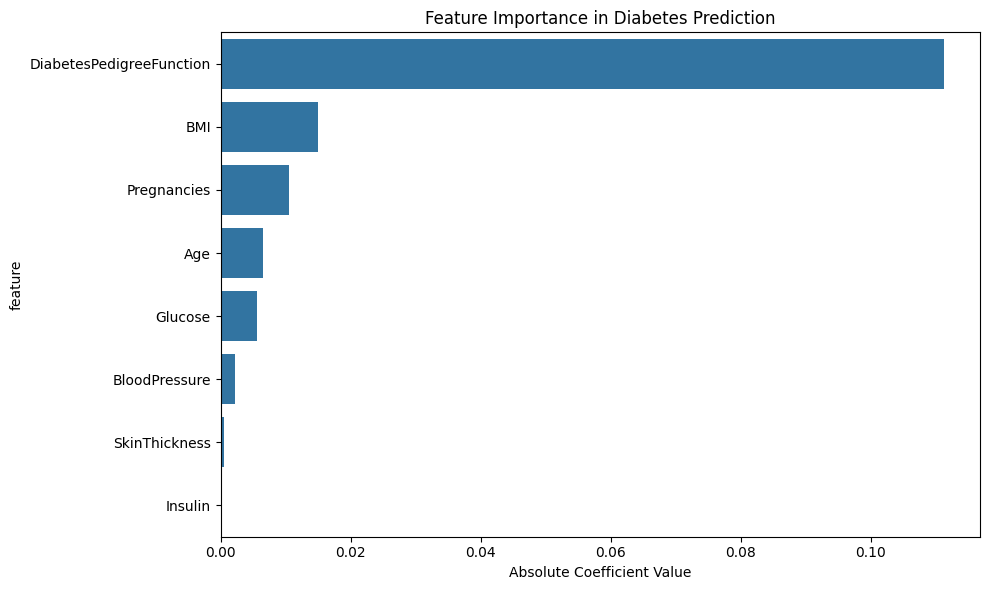

In [35]:
# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


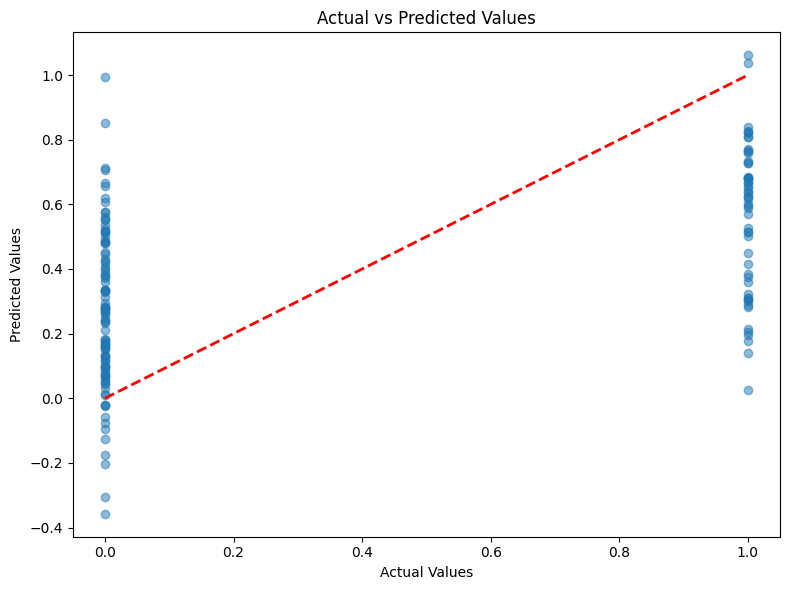

In [36]:
# 시각화: 실제값 vs 예측값

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

#### 다중선형회귀

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [38]:
# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

In [39]:
# 입력데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

In [40]:
# model 생성/학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
# result
print("* 회귀계수")
print(f"Study hours : {model.coef_[0]:.2f}")
print(f"Tutor hours : {model.coef_[1]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")


* 회귀계수
Study hours : 4.87
Tutor hours : 1.94
Intercept : 53.39


In [42]:
# 새로운 데이터로 예측
new_student = np.array([[6,2]]) # study:6, tutor:2
prediction = model.predict(new_student)
print(f"\n예측점수 : {prediction[0]:.1f}")


예측점수 : 86.5


In [43]:
# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared : {r_squared:.4f}")

R-squared : 0.9613


#### font

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [45]:
# font 설정
font_path = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
pd.options.display.float_format = '{:.2f}'.format # 지수 표현식 방지

In [46]:
# 데이터 생성
np.random.seed(42)
n_samples = 100

In [47]:
# 독립변수
X1 = np.random.normal(0,1,n_samples)
X2 = np.random.normal(0,1,n_samples)
X3 = np.random.normal(0,1,n_samples)

# 종속변수
Y = 2*X1 + 3*X2 + 1.5*X3 + np.random.normal(0,1,n_samples)

In [48]:
# DataFrame
data = pd.DataFrame({
    'X1' : X1, 
    'X2' : X2,
    'X3' : X3,
    'Y' : Y
})

In [49]:
# train, test data 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# prediction
y_pred = model.predict(X_test)

In [52]:
# result
print("* 회귀계수")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature} : {coef: .4f}")
print(f"\n* Intercept : {model.intercept_:.4f}")
print(f"\n* R-squared : {r2_score(y_test, y_pred):.4f}")
print(f"\n* 평균제곱근 오차(RMSE) : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


* 회귀계수
  X1 :  1.7882
  X2 :  2.9284
  X3 :  1.5135

* Intercept : 0.1535

* R-squared : 0.9566

* 평균제곱근 오차(RMSE) : 0.7174


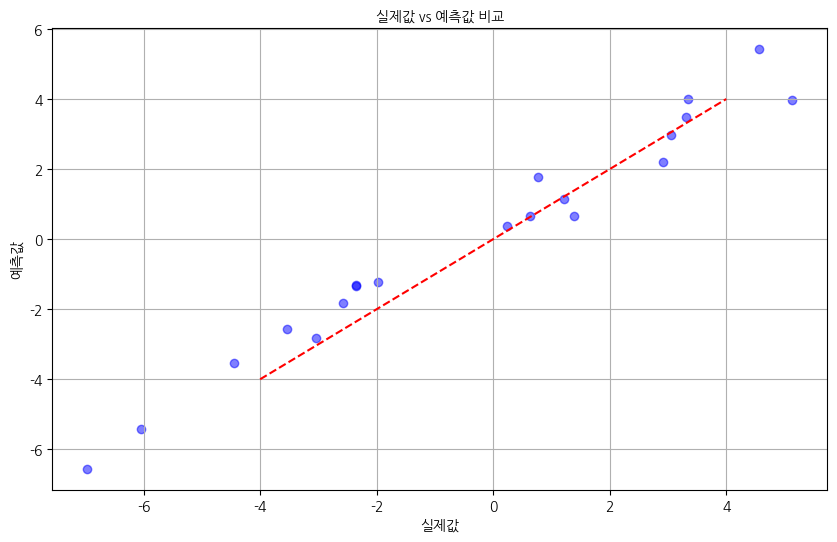

In [53]:
# 실제값과 예측값 비교 시각화
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('실제값 vs 예측값 비교', fontproperties=fontprop)
plt.grid(True)
plt.show()


<span style="color:red"> WARNING:matplotlib.font_manager:findfont: Font family 'NanumGothic' not found. </span>

> 내 PC - C드라이브 - 사용자 - human-15(사용자컴퓨터) - .maplotlib - font.json파일 삭제 - vscode다시 실행

In [55]:
# new_data 예측
new_data = np.array([[0.5,1.0,-0.5]])
prediction = model.predict(new_data)
print(f"\nnew data 예측값 : {prediction[0]:.4f}")


new data 예측값 : 3.2192


c:\AI_project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 선형회귀 추가학습

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

In [58]:
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [59]:
X = dataset.iloc[:, :-1].values # 마지막 한개 제외 (결과값 제외)
y = dataset.iloc[:,-1].values # 결과값만

X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [61]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

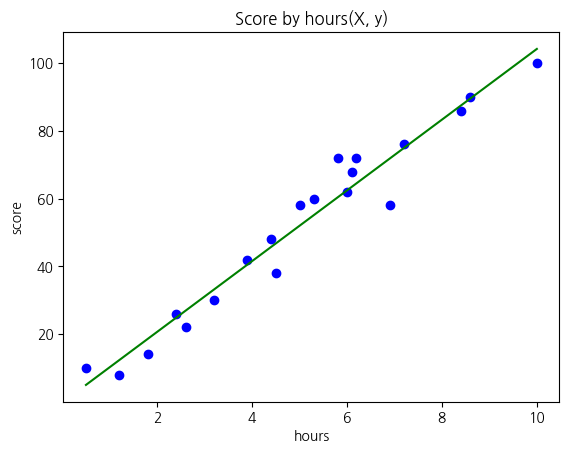

In [62]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'green')
plt.title('Score by hours(X, y)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [63]:
print('9시간 공부 시 예상 점수 : ', reg.predict([[9]]))

9시간 공부 시 예상 점수 :  [93.77478776]


In [64]:
reg.coef_ #기울기

array([10.44369694])

In [65]:
reg.intercept_ # y절편

np.float64(-0.218484702867201)

In [66]:
# 데이터는 똑같음 dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [68]:
print("* X_train")
X_train, len(X_train)

* X_train


(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [69]:
print("* X_test")
X_test, len(X_test)

* X_test


(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [70]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [71]:
print("* y_train")
y_train, len(y_train)

* y_train


(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [72]:
print("* y_test")
y_test, len(y_test)

* y_test


(array([ 90,   8, 100,  38]), 4)

In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

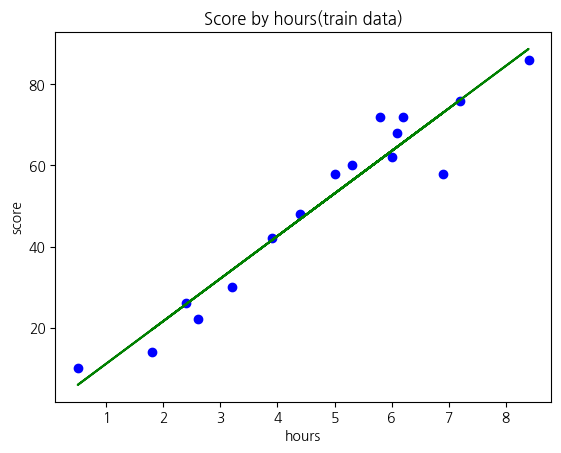

In [74]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

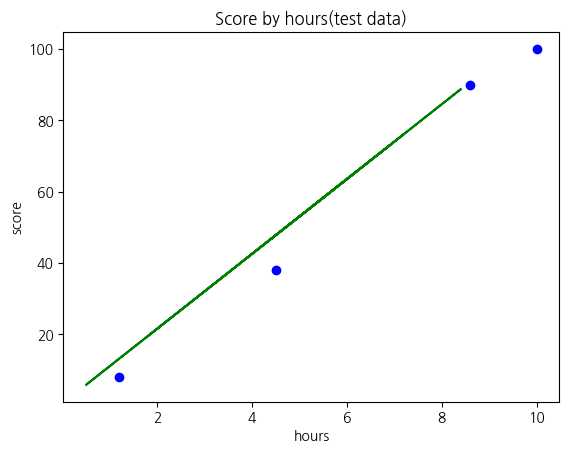

In [75]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#### 추가학습
학업 성취도 예측
> 데이터 설명
* Study_Hours: 하루 평균 공부 시간 (시간)
* Attendance_Rate: 출석률 (%)
* Parental_Education: 부모의 평균 학력 수준 (1: 초등학교 이하, 2: 중학교, 3: 고등학교, 4: 대학교 이상)
* Extra_Curricular: 방과 후 활동 참여 시간 (시간)
* Score: 학업 성취도 (점수)

In [76]:
# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [77]:
# 데이터
np.random.seed(42)
n_samples = 200
# 독립변수
data = pd.DataFrame({
    'Study_hours' : np.random.uniform(0,10,n_samples),
    'Attendance_rate' : np.random.uniform(50,100,n_samples),
    'Parental_education' : np.random.choice([1,2,3,4],n_samples),
    'Extra_curricular' : np.random.uniform(0,5,n_samples)
})
# 종속변수
data['Score'] = (
    data['Study_hours'] * 10 +
    data['Attendance_rate'] * 0.3 +
    data['Parental_education'] * 5 +
    data['Extra_curricular'] * 2 +
    np.random.normal(0, 5, n_samples)  # 노이즈 추가
)

In [78]:
# data 분리
X = data[['Study_hours','Attendance_rate','Parental_education','Extra_curricular']]
y = data['Score']

In [79]:
# 범주형 변수 변환(One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_parents_encoded = encoder.fit_transform(X[["Parental_education"]])
X_encoded = np.hstack([
    X[['Study_hours','Attendance_rate','Extra_curricular']].values,
    X_parents_encoded
])

In [80]:
# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [81]:
# data 분리
X_train, X_test, y_train, y_test, = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
# model 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [83]:
# 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE : {mse}")
print(f"R-squared : {r2}")

MSE : 23.638645973928725
R-squared : 0.9749424587982598


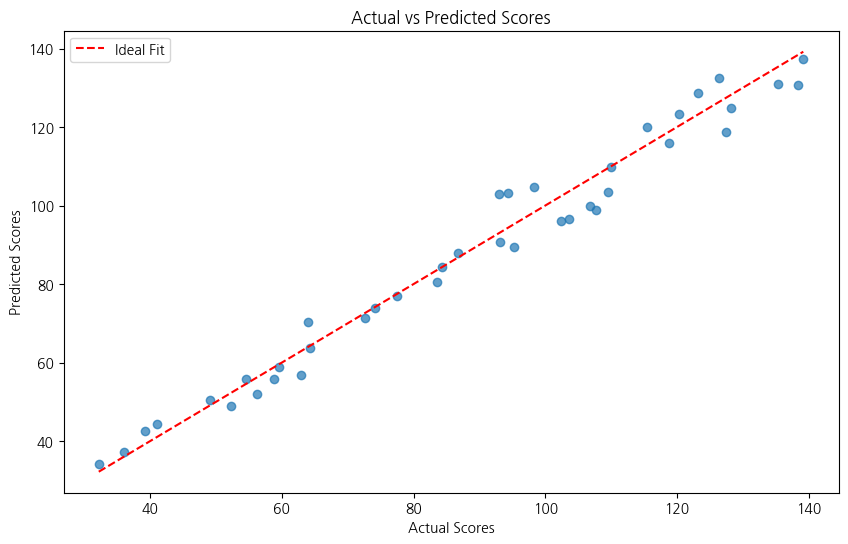

In [84]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',label = "Ideal Fit")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()  # 범례
plt.show()

##### 경사하강법 예제

In [85]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.20, NNZs: 6, Bias: 0.525639, T: 160, Avg. loss: 4275.427710
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 6, Bias: 0.881460, T: 320, Avg. loss: 4235.112639
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.42, NNZs: 6, Bias: 1.192396, T: 480, Avg. loss: 4202.982390
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 6, Bias: 1.477101, T: 640, Avg. loss: 4174.315806
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 6, Bias: 1.743499, T: 800, Avg. loss: 4147.837700
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 6, Bias: 1.995860, T: 960, Avg. loss: 4123.005364
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.77, NNZs: 6, Bias: 2.237333, T: 1120, Avg. loss: 4099.425410
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.85, NNZs: 6, Bias: 2.469574, T: 1280, Avg. loss: 4076.869690
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.92, NNZs: 6, Bias: 2.694125, T: 1440, Avg. loss: 4055.178908
Total 

c:\AI_project\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

In [86]:
print(X_train.shape)
print(y_train.shape)

(160, 6)
(160,)


ValueError: x and y must be the same size

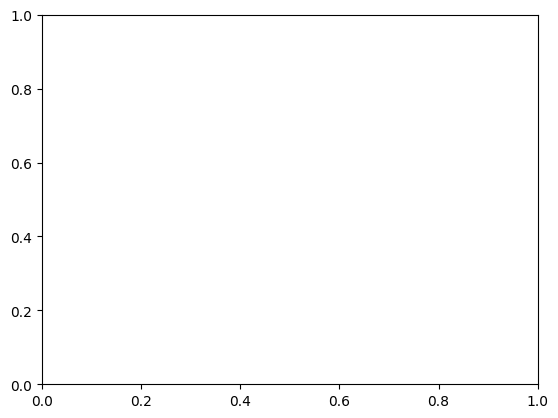

In [14]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [87]:
sr.coef_, sr.intercept_

(array([ 7.66036762,  0.60592109,  1.20381832, -0.07302224,  0.34811125,
         2.02324281]),
 array([23.97685065]))

In [88]:
sr.score(X_test, y_test)

-3.957562023805587

In [89]:
sr.score(X_train, y_train)

-4.067813586564625

#### 로지스틱 회귀

In [90]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [95]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # 훈련

LogisticRegression()

In [98]:
classifier.predict([[6]]) # 6시간 했을 때 예측

array([1])

In [111]:
classifier.predict_proba([[6]]) # 각 클래스에 속할 확률(분류에 사용)
# array([[0.141483, 0.858517]]) 0-> 14% 정도, 1->85%정도

array([[0.141483, 0.858517]])

In [101]:
classifier.predict([[4]])

array([0])

In [102]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [103]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [104]:
y_test

array([1, 0, 1, 0])

In [105]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [106]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [107]:
X_range = np.arange(min(X), max(X), 0.1)
X_range         # 1차원

C:\Users\human-15\AppData\Local\Temp\ipykernel_13856\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [108]:
# classifier.coef_: 모델의 계수(가중치), X_range: 입력 데이터, classifier.intercept_: 모델의 절편
p = 1/(1+np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p       # 2차원

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [110]:
X_range.shape

(95,)

In [112]:
p = p.reshape(-1)
p.shape

(95,)

위의 reshape 예시 arr = np.array([[1, 2, 3], [4, 5, 6]])

(2, 3) 형태의 배열을 (6,) 형태의 1차원 배열로 변환 arr_reshaped = arr.reshape(-1) print(arr_reshaped) # 출력: [1 2 3 4 5 6]

(2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환 arr_reshaped = arr.reshape(3, -1) print(arr_reshaped) # 출력: [[1 2], [3 4],[5 6]]

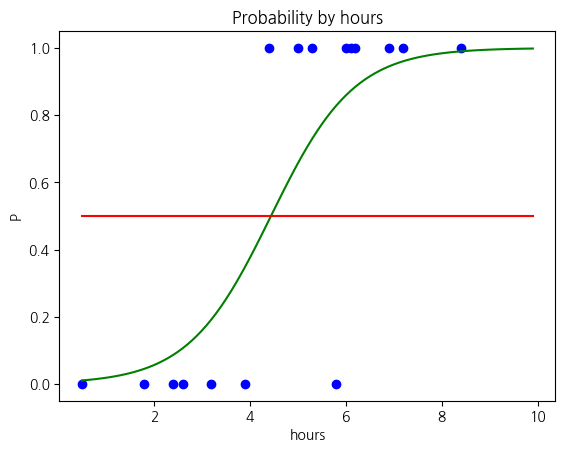

In [113]:
# X_train
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range),0.5), color='red')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

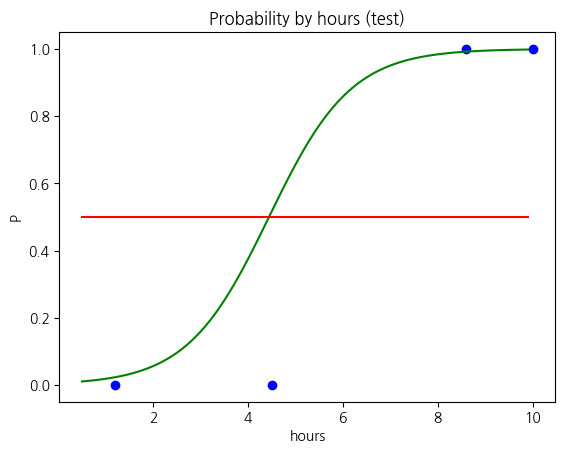

In [114]:
# X_test
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 분류

#### 의사결정나무

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [116]:
# Data load
iris = load_iris()
X = iris.data
y = iris.target

In [117]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=42)

In [118]:
# Decission tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
# prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 0])

In [122]:
# 정확도 평가
print("Accuracy : ", clf.score(X_test, y_test))

Accuracy :  0.9666666666666667
